<h1 align=center>Projet de Méthodes numériques pour les EDP : partie pratique</h1>

**M1 MApI3** / Groupe : Sébastien Roux, Anh Tuan Vũ, Sophie Willemot, Mehdi Zouitine

In [1]:
import numpy as np
import matplotlib.pyplot as plt

L'équation de Burgers est une équation qui sert à la modélisation des fluides, des phénomènes acoustiques et du trafic routier. Cette équation est définie comme:
$$\frac{\partial u}{\partial t}+u \frac{\partial u}{\partial x} =\nu \frac{\partial^{2} u}{\partial x^{2}}$$
L'équation de Burgers est étudiée sous 2 formes :
* `L'équation de Burgers sans viscosité` : $\frac{\partial u}{\partial t}+u \frac{\partial u}{\partial x}=0$
* `L'équation de Burgers avec viscosité` : $\frac{\partial u}{\partial t}+u \frac{\partial u}{\partial x}=\nu \frac{\partial^{2} u}{\partial x^{2}}$ où $\nu$ est le terme de viscosité.

La résolution exacte de l'équation de Burgers sans viscosité est semblable à la résolution d'une équation de transport. On utilise la `méthode des caractéristiques`.

# Résolution de l'équation non-visqueuse

On cherche une ligne caractéristique où l'équation non-visqueuse se réduit à une $EDO$.

Donc :

$$\frac{\mathrm{d} u[x(s), t(s)]}{\mathrm{d} s} = \frac{\mathrm{d} t}{\mathrm{d} s} \frac{\partial u}{\partial t}+\frac{\mathrm{d} x}{\mathrm{d} s} \frac{\partial u}{\partial x} = 0$$


On retrouve l'équation de Burgers non visqueuse en posant :

$$\begin{aligned}
&\frac{\mathrm{d} t}{\mathrm{d} s}=1 \\
&\frac{\mathrm{d} x}{\mathrm{d} s}=u 
\end{aligned}$$

et en supposant que $t(0) = 0$ on a :

$$\begin{array}{l}
t(s)=s \\
x(s)=x_{0}+u s=x_{0}+u t
\end{array}$$

Les caractéristiques sont des droites de pente $\nu$ sur lesquelles la solution est constante.

Comme pour l'équation de transport la solution est donnée par : $u = u(x_0)$ où $x_0$, qui correspond au pied de la caractéristique $x_0 = x_c – ut_c$.

# Résolution de l'équation visqueuse

La résolution de l'équation visqueuse est nettement plus compliquée. C'est pour cela qu'on la résout numériquement avec différents schémas **aux différences finies** présentés ci dessous.

## Schéma explicite


Pour calculer numériquement les solutions de l'équation visqueuse  nous avons besoin d'approximer les termes de l'équation : 


$$\frac{\partial u}{\partial t}+u \frac{\partial u}{\partial x} - \nu \frac{\partial^{2} u}{\partial x^{2}} = 0$$


* Le terme $\frac{\partial u}{\partial t} \approx \frac{u_{j}^{n+1}-u_{j}^{n}}{\Delta t}$



* Le terme $u \frac{\partial u}{\partial x}  \approx \frac{u_{j}^{n}\left(u_{j+1}^{n}-u_{j-1}^{n}\right)}{2 \Delta x}$


* Le terme $- \nu \frac{\partial^{2} u}{\partial x^{2}} \approx -\frac{\nu\left(u_{j-1}^{n}-2 u_{j}^{n}+u_{j+1}^{n}\right)}{\Delta x^{2}}$

Nous aboutissons donc au schéma suivant :

$$
\frac{u_{j}^{n+1}-u_{j}^{n}}{\Delta t}+\frac{u_{j}^{n}\left(u_{j+1}^{n}-u_{j-1}^{n}\right)}{2 \Delta x}-\frac{\nu\left(u_{j-1}^{n}-2 u_{j}^{n}+u_{j+1}^{n}\right)}{\Delta x^{2}}=0
$$

In [2]:
def explicite(n,dt,tf,nu):
    
    dx = 1/n
    r = nu*dt/(dx*dx)
    k=dt/(2*dx)
    
    X = np.zeros(n+1)
    U1 = np.zeros(n+1)
    U2 = np.zeros(n+1)
    a = np.zeros(n+1)
    b = np.zeros(n+1)
    c = np.zeros(n+1)
    d = np.zeros(n+1)
    c2 = np.zeros(n+1)
    d2 = np.zeros(n+1)
    
    for i in range(n+1):
        X[i]=(i-1)*dx
    
    for i in range(n+1):
        U1[i]=np.sin(2*np.pi*(i-1)/n)
    t=0
    while t < tf :
        t=t+dt
        
        for i in range(1,n):
            U2[i] = r*U1[i+1] + (1-2*r)*U1[i] + r*U1[i-1] -k*U1[i]*(U1[i+1]-U1[i-1])
            
        for i in range(n):
            U1[i]=U2[i]
            
    return X,U1

C:\Users\sebir\Anaconda3\lib\site-packages\ipykernel_launcher.py:27: RuntimeWarning: overflow encountered in double_scalars
C:\Users\sebir\Anaconda3\lib\site-packages\ipykernel_launcher.py:27: RuntimeWarning: invalid value encountered in double_scalars


Norme de la solution pour nu :  0.001  =  13.19169141503891
Norme de la solution pour nu :  0.01  =  12.087207138000574
Norme de la solution pour nu :  0.02  =  10.871094104098557
Norme de la solution pour nu :  0.025  =  nan


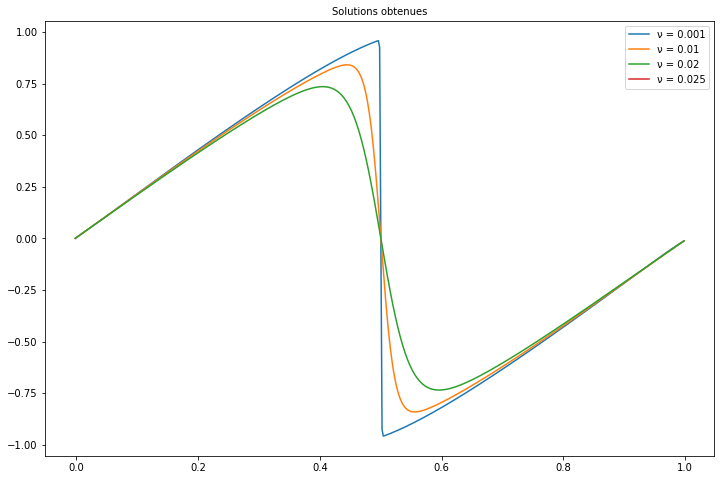

In [3]:
n = 500
dt = 10**-4
tf = 0.3
nu = [0.001,0.01,0.02,0.025]

U_f=[]
for i in nu :
    X,U = explicite(n, dt, tf, i)
    U_f.append(U)

plt.figure(figsize = (12,8))

for i, u in enumerate(U_f) :
    print("Norme de la solution pour nu : ",nu[i]," = ",np.linalg.norm(u))
    plt.plot(X, u, label = "ν = " + str(nu[i]))

plt.legend(); plt.title("Solutions obtenues", size = 10);

Pour certaines valeurs de $\nu$, on remarque que le schéma explicite est instable. On décide donc d'implémenter un schéma implicite.

## Schéma implicite

L'utilisation du schéma implicite nous permet d'éviter les problèmes d'instabilité vus au dessus.

$$
\frac{\Delta u_{j}^{n+1}}{\Delta t}=-\frac{L_{x}\left(F_{j}^{n}+F_{j}^{n+1}\right)}{2}+v \frac{L_{x x}\left(u_{j}^{n}+u_{j}^{n+1}\right)}{2}
$$

$$
\text { où } \Delta u_{j}^{n+1}=u_{j}^{n+1}-u_{j}^{n} \quad L_{x}=\frac{(-1,0,1)}{2 \Delta x} \quad \text { et } \quad L_{x x}=\frac{(1,-2,1)}{\Delta x^{2}}
$$

Pour résoudre l'équation avec ce schéma de façon efficace, nous allons utiliser l'algorithme de Thomas. Pour cela, nous devons avoir un système de matrices tridiagonales.

La forme tridiagonale peut être écrite de la manière suivante :

$$
a_{j}^{n} u_{j-1}^{n+1}+b_{j}^{n} u_{j}^{n+1}+c_{j}^{n} u_{+1}^{n+1}=d_{j}^{n}
$$

où
$$
\begin{array}{rcl}
a_{j}^{n}&=&-\frac{\Delta t}{4 \Delta x} u_{j-1}^{n}-\frac{s}{2}\\
b_{j}^{n}&=&1+s\\
c_{j}^{n}&=&\frac{\Delta t}{4 \Delta x} u_{j+1}^{n}-\frac{s}{2}\\
d_{j}^{n}&=&0.5 s u_{j-1}^{n}+(1-s) u_{j}^{n}+\frac{s}{2} u_{j+1}^{n}\\
s&=&\frac{v \Delta t}{\Delta x^{2}}
\end{array}$$

In [4]:
def implicite(n,dt,tf,nu):
    
    dx = 1/n
    r = nu*dt/(dx*dx)
    
    X = np.zeros(n+1)
    U1 = np.zeros(n+1)
    a = np.zeros(n+1)
    b = np.zeros(n+1)
    c = np.zeros(n+1)
    d = np.zeros(n+1)
    c2 = np.zeros(n+1)
    d2 = np.zeros(n+1)
    
    for i in range(n+1):
        X[i]=(i-1)*dx
    
    for i in range(n+1):
        U1[i]=np.sin(2*np.pi*(i-1)/n)
    t=0
    while t < tf :
        t=t+dt
    
        for j in range(1,n+1):
            a[j] = -0.25*dt*U1[j-1]/dx - 0.5*r
        for j in range(n+1):
            b[j] = 1+r
        for j in range(n):
            c[j] = 0.25*dt*U1[j+1]/dx - 0.5*r

        d[0]=(1-r)*U1[0] + 0.5*r*U1[1]
        d[n]=0.5*r*U1[n-1] + (1-r)*U1[n]
        for j in range(1,n):
            d[j] = 0.5*r*U1[j-1] + (1-r)*U1[j] + 0.5*r*U1[j+1]

        c2[0] = c[0]/b[0]
        d2[0] = d[0]/b[0]
        for i in range(1,n+1):
            c2[i] = c[i] / (b[i]-a[i]*c2[i-1])
            d2[i] = (d[i]-a[i]*d2[i-1]) / (b[i]-a[i]*c2[i-1])

        U1[n] = d2[n]
        for i in range(n):
            U1[n-1-i] = d2[n-1-i] - U1[n-2-i+2]*c2[n-1-i]
            
    return X,U1

Essai pour $\nu = 10^{-3}$ et divers temps finaux :

In [5]:
n = 500
dt = 10**-4
tf = [0,0.1,0.2,0.3,0.5,1,2]
nu = 10**-3

U_f1=[]
for t in tf :
    X,U = implicite(n,dt,t,nu)
    U_f1.append(U)

Affichage des solutions obtenues :

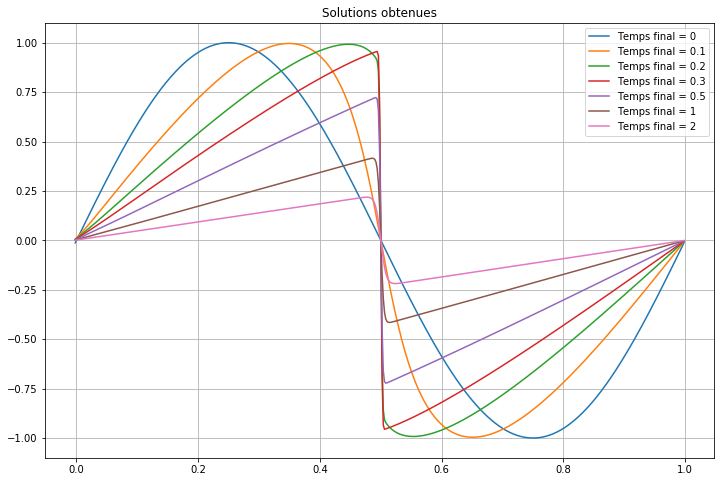

In [6]:
plt.figure(figsize = (12,8))

for i, u in enumerate(U_f1) :
    plt.plot(X, u, label = "Temps final = "+str(tf[i]))

plt.legend(); plt.title("Solutions obtenues", size = 12);
plt.grid();

Essai pour une viscosité plus petite : $\nu = 10^{-4}$, et deux temps finaux :

In [7]:
n = 500
dt = 10**-4
tf = [0.1,0.5]
nu = 10**-4

U_f2=[]
for i in tf :
    X,U = implicite(n,dt,i,nu)
    U_f2.append(U)

Affichage :

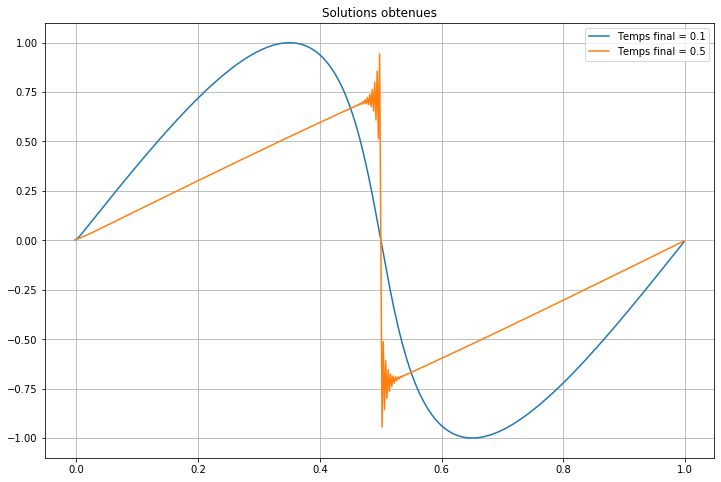

In [8]:
plt.figure(figsize = (12,8))

for i, u in enumerate(U_f2) :
    plt.plot(X, u, label = "Temps final = "+str(tf[i]))

plt.legend(); plt.title("Solutions obtenues", size = 12);
plt.grid();

On constate ici que pour une viscosité $\nu$ trop faible, la solution "explose" au point $\frac{1}{2}$. Il faudrait sûrement utiliser un autre schéma pour éviter cela.

Essai pour divers $\nu$ et pour $t_{final} = 0.3$ :

In [9]:
n = 500
dt = 10**-4
tf = 0.3
nu = [0.001,0.1,0.01,0.05,0.08,0.03,0.02,0.04,0.06,0.07,0.09]

U_f3=[]
for i in nu :
    X,U = implicite(n,dt,tf,i)
    U_f3.append(U)

Affichage :

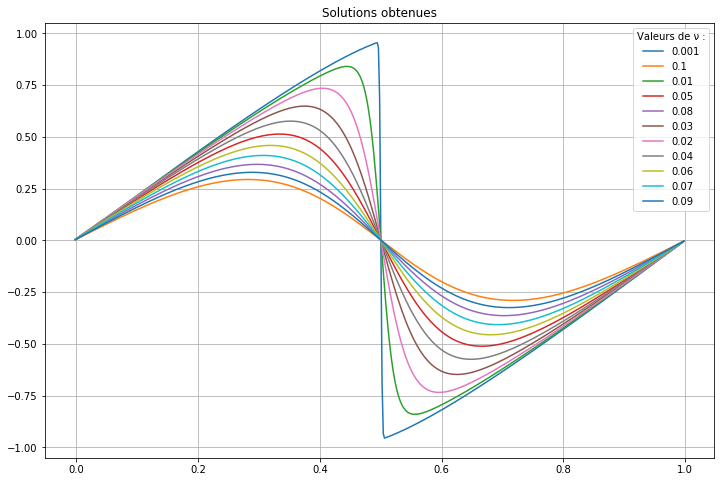

In [10]:
plt.figure(figsize = (12,8))

for i, u in enumerate(U_f3) :
    plt.plot(X, u, label = str(nu[i]))

plt.legend(title='Valeurs de ν :'); plt.title("Solutions obtenues", size = 12);
plt.grid();

Aprés avoir implémenté le schéma demandé dans l'énoncé, nous nous sommes intéressés par curiosité à une autre méthode numérique : la `méthode parabolique`.

Partons de l'équation $$u_{t}+u u_{x}=\nu u_{x x},$$ nous pouvons la réécrire :

$$u_{t}+[f(u)]_{x}=\nu u_{x x} \quad \text { avec } \quad f(u)=\frac{u^{2}}{2} $$
en integrant entre $x_{j-1 / 2}$ et $x_{j+1 / 2}$ de chaques cotés de l'inégalité notre equation se reduit à : 
$$\int_{x_{j-1 / 2}}^{x_{j+1 / 2}} u_{t} d x-\left[\nu u_{x}\right]_{x_{j-1 / 2}}^{x_{j+1 / 2}}=-[f(u)]_{x_{j-1 / 2}}^{x_{j+1 / 2}}. \quad \quad \quad (*)$$

Maintenant nous allons approximer chacun des termes dans $(*)$ : 

* `Le premier terme peut être approximé par` : $\int_{x_{j-1 / 2}}^{x_{j+1 / 2}} u_{t} d x \approx \frac{d u}{d t}\left(x_{j}, t\right) h$

* `Le deuxième terme peut être approximé par` : $-\left[\nu u_{x}\right]_{x_{j-1 / 2}}^{x_{j+1 / 2}}=\nu\left[u_{x}\left(x_{j-1 / 2}, t\right)-u_{x}\left(x_{j+1 / 2}, t\right)\right] \approx \nu\left[\frac{u\left(x_{j}, t\right)-u\left(x_{j-1}, t\right)}{h}-\frac{u\left(x_{j+1}, t\right)-u\left(x_{j}, t\right)}{h}\right] = -\nu \frac{u\left(x_{j+1}, t\right)-2 u\left(x_{j}, t\right)+u\left(x_{j-1}, t\right)}{h}$

* `Le dernier terme peut être approximé par` : $-[f(u)]_{x_{j-1 / 2}}^{x_{j+1 / 2}}=f\left(u\left(x_{j-1 / 2}, t\right)\right)-f\left(u\left(x_{j+1 / 2}, t\right)\right)$

En rassemblant toutes les approximations dans l'équation $(*)$ et en divisant par $h$ on obtient un système d'$EDO$ :
$$\frac{d U_{j}}{d t}-\nu \frac{U_{j+1}-2 U_{j}+U_{j-1}}{h^{2}}=\frac{f\left(U_{j-\frac{1}{2}}\right)-f\left(U_{j+\frac{1}{2}}\right)}{h}$$  où $U_{j}(t) = u\left(x_{j}, t\right)$.

On obtient finalement le schéma explicite suivant : 

$$U_{j}^{n+1}=U_{j}^{n}+k\left(\nu \frac{U_{j+1}^{n}-2 U_{j}^{n}+U_{j-1}^{n}}{h^{2}}+\frac{f\left(U_{j+\frac{1}{2}}^{n}\right)-f\left(U_{j-\frac{1}{2}}\right)}{h}\right)$$

où $f\left(U_{j_{\pm\frac{1}{2}}}\right)$ est la moyenne de $f\left(U_{j}\right)$ et de  $f\left(U_{j_{\pm 1}}\right) $.

Ci-dessous se trouvent les résultats de la méthode. Nous interprétons difficilement le comportement des solutions obtenues mais nous trouvions intéressant d'essayer une autre approche.

In [11]:
from mpl_toolkits.mplot3d import Axes3D
import warnings
warnings.filterwarnings('ignore')

Définition de la condition initiale et des fonctions utilisées plus tard :

In [12]:
def uinit(x):
#     return np.array([1.*(x_i <= 0) for x_i in x])   # Autre solution pour tester
    return np.sin(2*np.pi*x) # On prend la même initialisation que précédemment pour pouvoir comparer

f = lambda u: 0.5 * u**2

Test et affichage :

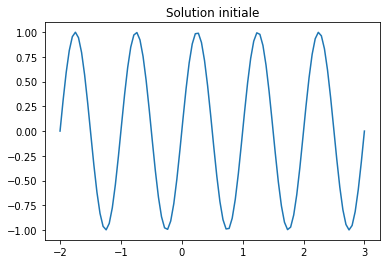

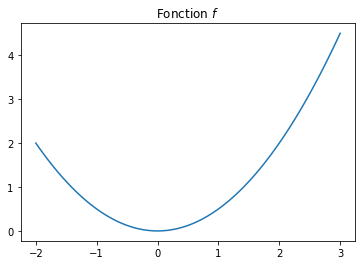

In [13]:
abscisses = np.linspace(-2, 3, 100)
plt.plot(abscisses, uinit(abscisses)); plt.title("Solution initiale");
plt.show()

plt.plot(abscisses, f(abscisses)); plt.title("Fonction $f$");

Paramètres :

In [14]:
x_end = 2
t_end = 2

# Précision en espace
N = 100
dx = x_end/N

x = np.arange(0, x_end, dx)

# Précision en temps
dt = 0.1
nt = int(t_end / dt)
dt = t_end / nt

Préparation de la condition initiale :

In [15]:
u0 = uinit(x)

u = np.copy(u0)
result = np.zeros(np.shape(u0))
U = np.zeros((nt,len(u)))

Le schéma :

In [16]:
V = 0.05

for i in range(nt):
    end = len(u) - 1
    fminus = 0.5 * (f(u[1:end-1]) + f(u[0:end-2]))
    fplus  = 0.5 * (f(u[1:end-1]) + f(u[2:end]))
    
    result[1:end-1] = u[1:end-1] + dt * (V * (u[2:end] - 2*u[1:end-1]
                    + u[0:end-2])/dx**2 - (fplus - fminus)/dx)
    
    result[0]   = u[0]
    result[end] = u[end]

    u = result
    U[i, :] = u

Affichage de la solution :

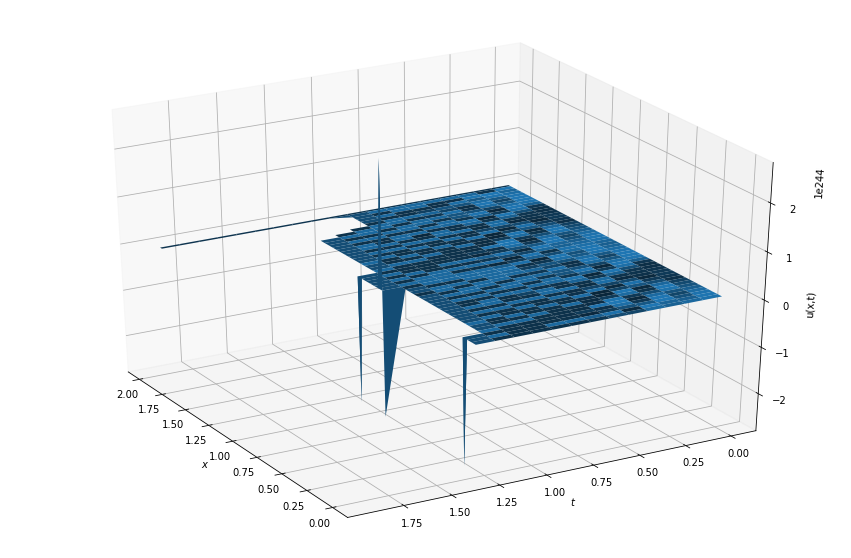

In [17]:
T = np.arange(0, t_end, dt)

# Préparation données
abscisses, ordonnées = np.meshgrid(x, T)

fig = plt.figure(figsize = (15,10))
ax = fig.gca(projection='3d')

# Angle
ax.view_init(30, 150)

ax.plot_surface(abscisses, ordonnées, U)

ax.set_xlabel('$x$'); ax.set_ylabel('$t$'); ax.set_zlabel('u(x,t)');
fig.show()

# Bibliographie
* [Polycopié sur l'équation de Burgers](http://www.bcamath.org/projects/NUMERIWAVES/Burgers_Equation_M_Landajuela.pdf) (en anglais)
* [Étude sur les différences finies pour l'équation de Burgers](http://static.dergipark.org.tr/article-download/imported/1060001592/1060000895.pdf?) (en anglais)
* [Implémentation de l'équation de Burgers en Fortan](http://hmf.enseeiht.fr/travaux/CD0001/travaux/optmfn/hi/01pa/hyb41/reportbid.htm) (en anglais)
* [Slides de cours sur l'optimisation numérique et le calcul scientifique](http://www.dalembert.upmc.fr/home/gomez/images/Documents/cours_methodenum_burgers_a4e04.pdf)
* [Schéma sous forme conservative pour l'équation de Burgers](https://www.math.univ-paris13.fr/~basdevan/MACS1_EDP/Luneville/SchemaBurgers.html)
* [Cours sur l'équation de Burgers et implémentation en MATLAB](https://www.iist.ac.in/sites/default/files/people/IN08026/Burgers_equation_viscous.pdf) (en anglais)